In [1]:
from Models.MainModel import InitModel
from Config import Config
from Utils.Visualization import ShowCAM
from Utils.FileOperation import ls

from pytorch_grad_cam import GradCAMPlusPlus as CAM
import numpy as np
import torch
import random
from PIL import Image

In [2]:
config = Config()
config.apply()

In [3]:
transform = config.test.transform['standard']
checkpoint_paths = [
    ('Checkpoints/_GridSearch/WDF_W4_D32/checkpoint_25.pth', config),
    ('Checkpoints/_Ablation/NoGaze/checkpoint_25.pth', config),
]
data_paths = []
data_root = config.basic.rootDir + 'clipped_videos/WDF_clip/fake_test/'
current_files = ls(data_root)
random.shuffle(current_files)
for i in range(10):
    data_paths.append(data_root + current_files[i])

Initializing base model
Checkpoints/_GridSearch/WDF_W4_D32/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/fake_test/fake_test_61_16_6.mp4
 > Prediction: [0.5671746  0.43282542]
Initializing base model
Checkpoints/_Ablation/NoGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/fake_test/fake_test_61_16_6.mp4
 > Prediction: [0.99782735 0.00217267]


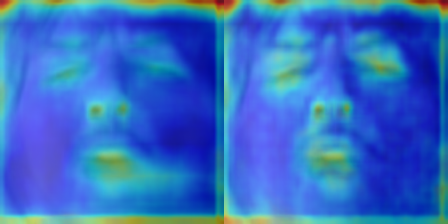

Initializing base model
Checkpoints/_GridSearch/WDF_W4_D32/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/fake_test/fake_test_50_19_6.mp4
 > Prediction: [0.00941399 0.990586  ]
 > Skip
Initializing base model
Checkpoints/_GridSearch/WDF_W4_D32/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/fake_test/fake_test_40_9_3.mp4
 > Prediction: [0.9982351  0.00176493]
Initializing base model
Checkpoints/_Ablation/NoGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/fake_test/fake_test_40_9_3.mp4
 > Prediction: [0.99682754 0.00317245]


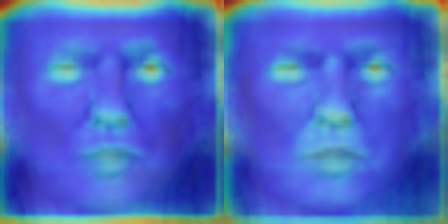

Initializing base model
Checkpoints/_GridSearch/WDF_W4_D32/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/fake_test/fake_test_79_20_6.mp4
 > Prediction: [0.9974292  0.00257077]
Initializing base model
Checkpoints/_Ablation/NoGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/fake_test/fake_test_79_20_6.mp4
 > Prediction: [0.17034644 0.82965356]
 > Skip
Initializing base model
Checkpoints/_GridSearch/WDF_W4_D32/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/fake_test/fake_test_7_220_83.mp4
 > Prediction: [9.999994e-01 5.826156e-07]
Initializing base model
Checkpoints/_Ablation/NoGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/fake_test/fake_test_7_220_83.mp4
 > Prediction: [9.999999e-01 1.169983e-07]


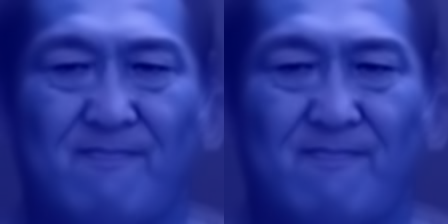

Initializing base model
Checkpoints/_GridSearch/WDF_W4_D32/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/fake_test/fake_test_13_0_290.mp4
 > Prediction: [9.9955076e-01 4.4926003e-04]
Initializing base model
Checkpoints/_Ablation/NoGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/fake_test/fake_test_13_0_290.mp4
 > Prediction: [0.99742305 0.00257701]


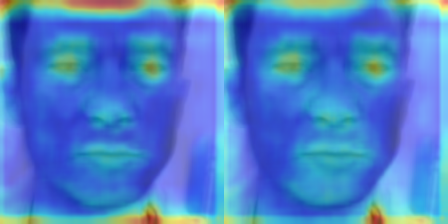

Initializing base model
Checkpoints/_GridSearch/WDF_W4_D32/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/fake_test/fake_test_89_0_10.mp4
 > Prediction: [9.992884e-01 7.115903e-04]
Initializing base model
Checkpoints/_Ablation/NoGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/fake_test/fake_test_89_0_10.mp4
 > Prediction: [9.9974877e-01 2.5123372e-04]


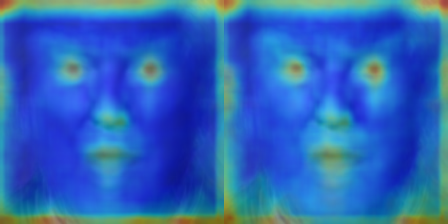

Initializing base model
Checkpoints/_GridSearch/WDF_W4_D32/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/fake_test/fake_test_21_0_36.mp4
 > Prediction: [0.8411411  0.15885884]
Initializing base model
Checkpoints/_Ablation/NoGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/fake_test/fake_test_21_0_36.mp4
 > Prediction: [0.9989992  0.00100085]


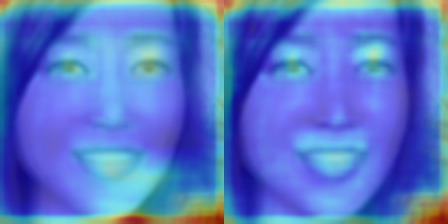

Initializing base model
Checkpoints/_GridSearch/WDF_W4_D32/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/fake_test/fake_test_45_16_1.mp4
 > Prediction: [0.81814426 0.1818558 ]
Initializing base model
Checkpoints/_Ablation/NoGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/fake_test/fake_test_45_16_1.mp4
 > Prediction: [0.36173043 0.6382696 ]
 > Skip
Initializing base model
Checkpoints/_GridSearch/WDF_W4_D32/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/fake_test/fake_test_103_0_6.mp4
 > Prediction: [0.99179065 0.0082093 ]
Initializing base model
Checkpoints/_Ablation/NoGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/fake_test/fake_test_103_0_6.mp4
 > Prediction: [0.03199698 0.96800303]
 > Skip


In [4]:
for data_path in data_paths:
    result = []
    skip_flag = False
    for checkpoint_path, current_config in checkpoint_paths:
        model = InitModel(current_config)
        checkpoint = torch.load(checkpoint_path)
        model.load_state_dict(checkpoint['state_dict'])
        target_layers = [
            model.module.base_model.layer1[-1],
            model.module.base_model.layer2[-1],
            model.module.base_model.layer3[-1],
            model.module.base_model.layer4[-1]
        ]
        cam = CAM(model=model, target_layers=target_layers, use_cuda=True)
        print(checkpoint_path, data_path)
        showCAM_result = ShowCAM(cam, model, data_path, transform, show=False, wanted_result_type='TN')
        if showCAM_result is None:
            skip_flag = True
            break
        result.append(showCAM_result)
    
    if skip_flag:
        continue
        
    mean_img = [np.zeros((224,224,3)), np.zeros((224,224,3))]
    for i in range(len(checkpoint_paths)):
        for j in range(14):
            mean_img[i] += np.array(result[i][j])
        mean_img[i] /= 14
        mean_img[i] = Image.fromarray(mean_img[i].astype(np.uint8))
    
    concatenated_image = Image.new('RGB', (224*len(checkpoint_paths), 224))
    for i in range(len(checkpoint_paths)):
        concatenated_image.paste(mean_img[i], (224*i, 0))
    concatenated_image.show()

In [3]:
transform = config.test.transform['standard']
checkpoint_paths = [
    ('Checkpoints/_GridSearch/WDF_W4_D32/checkpoint_25.pth', config),
    ('Checkpoints/_Ablation/NoGaze/checkpoint_25.pth', config),
]
data_paths = []
data_root = config.basic.rootDir + 'clipped_videos/WDF_clip/real_test/'
current_files = ls(data_root)
random.shuffle(current_files)
for i in range(10):
    data_paths.append(data_root + current_files[i])

Initializing base model
Checkpoints/_GridSearch/WDF_W4_D32/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/real_test/real_test_46_0_24.mp4
 > Prediction: [0.9941012  0.00589871]
 > Skip
Initializing base model
Checkpoints/_GridSearch/WDF_W4_D32/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/real_test/real_test_69_79_3.mp4
 > Prediction: [0.00112911 0.9988709 ]
Initializing base model
Checkpoints/_Ablation/NoGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/real_test/real_test_69_79_3.mp4
 > Prediction: [7.055147e-09 1.000000e+00]


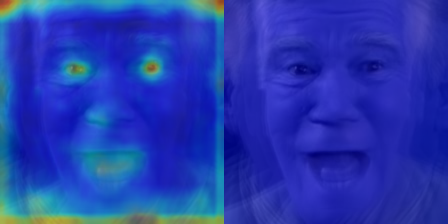

Initializing base model
Checkpoints/_GridSearch/WDF_W4_D32/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/real_test/real_test_93_127_2.mp4
 > Prediction: [0.01304736 0.98695266]
Initializing base model
Checkpoints/_Ablation/NoGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/real_test/real_test_93_127_2.mp4
 > Prediction: [1.0898366e-04 9.9989104e-01]


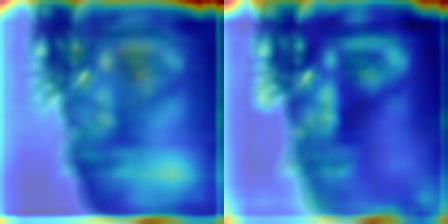

Initializing base model
Checkpoints/_GridSearch/WDF_W4_D32/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/real_test/real_test_46_0_8.mp4
 > Prediction: [0.8552801  0.14471985]
 > Skip
Initializing base model
Checkpoints/_GridSearch/WDF_W4_D32/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/real_test/real_test_86_176_1.mp4
 > Prediction: [7.2143244e-04 9.9927860e-01]
Initializing base model
Checkpoints/_Ablation/NoGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/real_test/real_test_86_176_1.mp4
 > Prediction: [2.2313327e-05 9.9997771e-01]


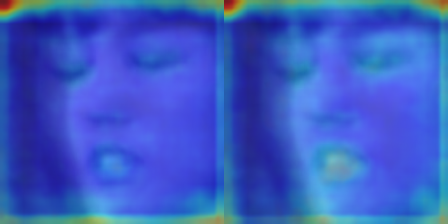

Initializing base model
Checkpoints/_GridSearch/WDF_W4_D32/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/real_test/real_test_29_374_0.mp4
 > Prediction: [0.22329743 0.7767025 ]
Initializing base model
Checkpoints/_Ablation/NoGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/real_test/real_test_29_374_0.mp4
 > Prediction: [0.01750496 0.98249507]


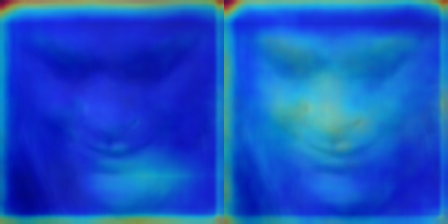

Initializing base model
Checkpoints/_GridSearch/WDF_W4_D32/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/real_test/real_test_104_53_4.mp4
 > Prediction: [0.99714726 0.0028528 ]
 > Skip
Initializing base model
Checkpoints/_GridSearch/WDF_W4_D32/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/real_test/real_test_92_173_3.mp4
 > Prediction: [0.8447691  0.15523088]
 > Skip
Initializing base model
Checkpoints/_GridSearch/WDF_W4_D32/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/real_test/real_test_46_0_85.mp4
 > Prediction: [0.76759654 0.23240343]
 > Skip
Initializing base model
Checkpoints/_GridSearch/WDF_W4_D32/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/real_test/real_test_104_65_6.mp4
 > Prediction: [0.04469865 0.95530134]
Initializing base model
Checkpoints/_Ablation/NoGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/WDF_clip/real_test/real_test_104_65_6.mp4
 > Prediction: [9

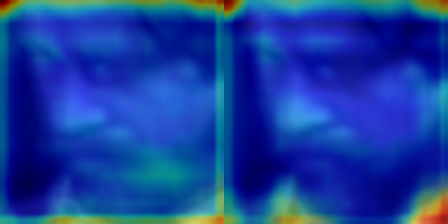

In [4]:
for data_path in data_paths:
    result = []
    skip_flag = False
    for checkpoint_path, current_config in checkpoint_paths:
        model = InitModel(current_config)
        checkpoint = torch.load(checkpoint_path)
        model.load_state_dict(checkpoint['state_dict'])
        target_layers = [
            model.module.base_model.layer1[-1],
            model.module.base_model.layer2[-1],
            model.module.base_model.layer3[-1],
            model.module.base_model.layer4[-1]
        ]
        cam = CAM(model=model, target_layers=target_layers, use_cuda=True)
        print(checkpoint_path, data_path)
        showCAM_result = ShowCAM(cam, model, data_path, transform, show=False, wanted_result_type='TP')
        if showCAM_result is None:
            skip_flag = True
            break
        result.append(showCAM_result)
    
    if skip_flag:
        continue
        
    mean_img = [np.zeros((224,224,3)), np.zeros((224,224,3))]
    for i in range(len(checkpoint_paths)):
        for j in range(14):
            mean_img[i] += np.array(result[i][j])
        mean_img[i] /= 14
        mean_img[i] = Image.fromarray(mean_img[i].astype(np.uint8))
    
    concatenated_image = Image.new('RGB', (224*len(checkpoint_paths), 224))
    for i in range(len(checkpoint_paths)):
        concatenated_image.paste(mean_img[i], (224*i, 0))
    concatenated_image.show()